In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [17]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0003)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0001)

In [18]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [19]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [20]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [21]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [22]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 1 of 200
Generator loss: 0.00578716, Discriminator loss: 0.01541247


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 2 of 200
Generator loss: 0.00907375, Discriminator loss: 0.00969435


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 3 of 200
Generator loss: 0.00741703, Discriminator loss: 0.01258988


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 4 of 200
Generator loss: 0.01422338, Discriminator loss: 0.00821287


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.35it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


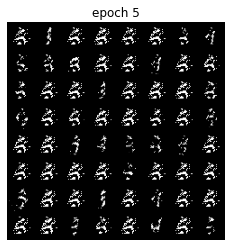

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 5 of 200
Generator loss: 0.01227369, Discriminator loss: 0.00928325


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 6 of 200
Generator loss: 0.01874058, Discriminator loss: 0.00640645


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 7 of 200
Generator loss: 0.02635612, Discriminator loss: 0.00658432


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 8 of 200
Generator loss: 0.02089440, Discriminator loss: 0.00629801


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 9 of 200
Generator loss: 0.02278201, Discriminator loss: 0.00406261


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.32it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


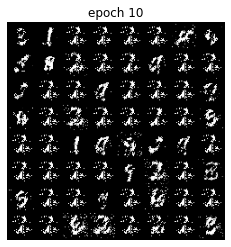

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 10 of 200
Generator loss: 0.01963344, Discriminator loss: 0.00745809


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 11 of 200
Generator loss: 0.01404773, Discriminator loss: 0.00764923


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 12 of 200
Generator loss: 0.01857285, Discriminator loss: 0.00679848


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 13 of 200
Generator loss: 0.02022842, Discriminator loss: 0.00679423


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 14 of 200
Generator loss: 0.02214253, Discriminator loss: 0.00500321


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.27it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


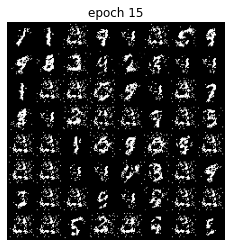

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.79it/s]

Epoch 15 of 200
Generator loss: 0.02022663, Discriminator loss: 0.00498193


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 16 of 200
Generator loss: 0.02521779, Discriminator loss: 0.00415809


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 17 of 200
Generator loss: 0.02216862, Discriminator loss: 0.00398572


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 18 of 200
Generator loss: 0.02345557, Discriminator loss: 0.00413232


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 19 of 200
Generator loss: 0.02308747, Discriminator loss: 0.00495671


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.31it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


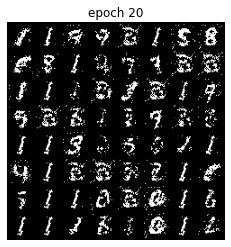

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 20 of 200
Generator loss: 0.02612021, Discriminator loss: 0.00437355


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 21 of 200
Generator loss: 0.02475667, Discriminator loss: 0.00292381


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.79it/s]

Epoch 22 of 200
Generator loss: 0.03170287, Discriminator loss: 0.00237412


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 23 of 200
Generator loss: 0.02814294, Discriminator loss: 0.00360430


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 24 of 200
Generator loss: 0.02912697, Discriminator loss: 0.00292238


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.30it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


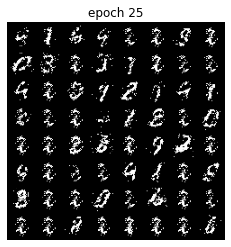

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 25 of 200
Generator loss: 0.02893842, Discriminator loss: 0.00255256


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 26 of 200
Generator loss: 0.02884821, Discriminator loss: 0.00267510


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 27 of 200
Generator loss: 0.03203905, Discriminator loss: 0.00357115


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 28 of 200
Generator loss: 0.03158553, Discriminator loss: 0.00391672


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 29 of 200
Generator loss: 0.04065837, Discriminator loss: 0.00290451


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.37it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


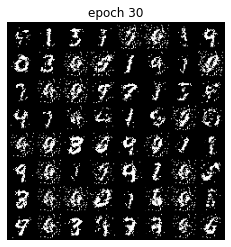

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 30 of 200
Generator loss: 0.02686510, Discriminator loss: 0.00518621


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 31 of 200
Generator loss: 0.02527794, Discriminator loss: 0.00472186


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 32 of 200
Generator loss: 0.03146428, Discriminator loss: 0.00390227


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 33 of 200
Generator loss: 0.02224228, Discriminator loss: 0.00439240


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 34 of 200
Generator loss: 0.02257346, Discriminator loss: 0.00570391


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.40it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


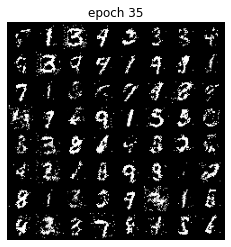

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 35 of 200
Generator loss: 0.01588536, Discriminator loss: 0.00622599


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 36 of 200
Generator loss: 0.01585936, Discriminator loss: 0.00722117


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 37 of 200
Generator loss: 0.01263199, Discriminator loss: 0.00709727


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 38 of 200
Generator loss: 0.01422520, Discriminator loss: 0.00728062


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 39 of 200
Generator loss: 0.01379716, Discriminator loss: 0.00754446


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.29it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


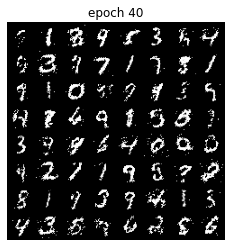

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 40 of 200
Generator loss: 0.01349853, Discriminator loss: 0.00776972


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 41 of 200
Generator loss: 0.00971621, Discriminator loss: 0.00920451


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 42 of 200
Generator loss: 0.01099053, Discriminator loss: 0.00923585


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 43 of 200
Generator loss: 0.01129574, Discriminator loss: 0.00871385


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 44 of 200
Generator loss: 0.01073611, Discriminator loss: 0.00945655


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.42it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


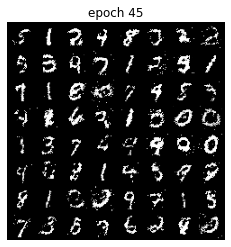

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 45 of 200
Generator loss: 0.01026251, Discriminator loss: 0.01001205


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 46 of 200
Generator loss: 0.00974784, Discriminator loss: 0.00920317


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 47 of 200
Generator loss: 0.01015691, Discriminator loss: 0.00956782


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 48 of 200
Generator loss: 0.00920128, Discriminator loss: 0.01033254


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 49 of 200
Generator loss: 0.00906049, Discriminator loss: 0.01060250


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.37it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


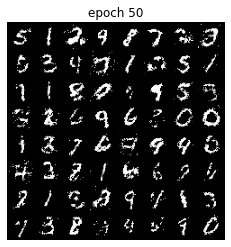

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 50 of 200
Generator loss: 0.00859447, Discriminator loss: 0.01059737


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 51 of 200
Generator loss: 0.00882757, Discriminator loss: 0.01042619


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 52 of 200
Generator loss: 0.00776348, Discriminator loss: 0.01065389


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 53 of 200
Generator loss: 0.00824289, Discriminator loss: 0.01098883


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 54 of 200
Generator loss: 0.00701035, Discriminator loss: 0.01193315


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.28it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


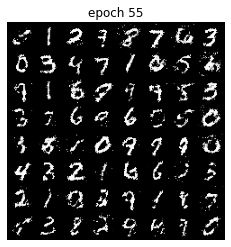

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 55 of 200
Generator loss: 0.00815634, Discriminator loss: 0.01046266


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 56 of 200
Generator loss: 0.00780828, Discriminator loss: 0.01092633


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 57 of 200
Generator loss: 0.00766470, Discriminator loss: 0.01215487


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 58 of 200
Generator loss: 0.00750416, Discriminator loss: 0.01114225


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 59 of 200
Generator loss: 0.00698288, Discriminator loss: 0.01135460


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.16it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


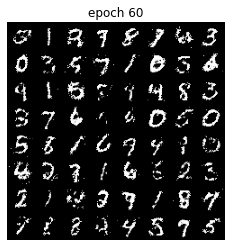

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 60 of 200
Generator loss: 0.00712168, Discriminator loss: 0.01143176


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 61 of 200
Generator loss: 0.00701762, Discriminator loss: 0.01138206


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 62 of 200
Generator loss: 0.00707609, Discriminator loss: 0.01094343


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 63 of 200
Generator loss: 0.00742234, Discriminator loss: 0.01109568


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 64 of 200
Generator loss: 0.00705034, Discriminator loss: 0.01105727


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


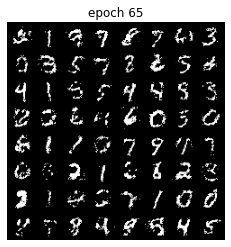

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 65 of 200
Generator loss: 0.00687506, Discriminator loss: 0.01109185


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 66 of 200
Generator loss: 0.00734132, Discriminator loss: 0.01151523


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 67 of 200
Generator loss: 0.00649152, Discriminator loss: 0.01189823


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 68 of 200
Generator loss: 0.00624426, Discriminator loss: 0.01159736


  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.69it/s]

Epoch 69 of 200
Generator loss: 0.00749380, Discriminator loss: 0.01152360


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.42it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


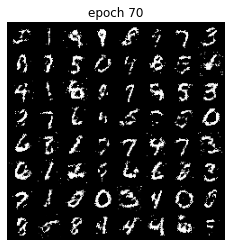

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 70 of 200
Generator loss: 0.00765691, Discriminator loss: 0.01139748


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 71 of 200
Generator loss: 0.00678329, Discriminator loss: 0.01103489


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 72 of 200
Generator loss: 0.00694942, Discriminator loss: 0.01081164


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 73 of 200
Generator loss: 0.00721449, Discriminator loss: 0.01097301


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 74 of 200
Generator loss: 0.00863734, Discriminator loss: 0.01057049


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.52it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


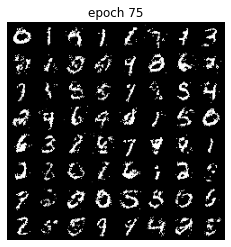

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 75 of 200
Generator loss: 0.00851398, Discriminator loss: 0.01052759


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 76 of 200
Generator loss: 0.00783856, Discriminator loss: 0.01058380


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 77 of 200
Generator loss: 0.00848206, Discriminator loss: 0.00958220


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 78 of 200
Generator loss: 0.00806133, Discriminator loss: 0.01129978


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 79 of 200
Generator loss: 0.00762749, Discriminator loss: 0.01037659


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.48it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


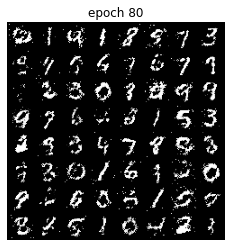

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 80 of 200
Generator loss: 0.00798586, Discriminator loss: 0.01049865


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 81 of 200
Generator loss: 0.00828545, Discriminator loss: 0.01085443


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 82 of 200
Generator loss: 0.00813204, Discriminator loss: 0.01064462


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 83 of 200
Generator loss: 0.00845891, Discriminator loss: 0.01033844


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 84 of 200
Generator loss: 0.00700053, Discriminator loss: 0.01115858


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


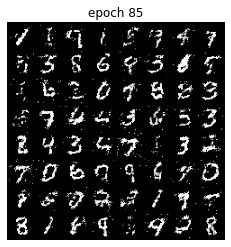

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 85 of 200
Generator loss: 0.00759294, Discriminator loss: 0.01147056


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 86 of 200
Generator loss: 0.00750117, Discriminator loss: 0.01021767


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 87 of 200
Generator loss: 0.00681264, Discriminator loss: 0.01096324


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 88 of 200
Generator loss: 0.00672075, Discriminator loss: 0.01107117


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 89 of 200
Generator loss: 0.00731646, Discriminator loss: 0.01077410


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


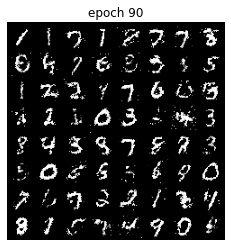

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 90 of 200
Generator loss: 0.00642068, Discriminator loss: 0.01113477


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 91 of 200
Generator loss: 0.00680897, Discriminator loss: 0.01149535


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 92 of 200
Generator loss: 0.00655073, Discriminator loss: 0.01130860


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 93 of 200
Generator loss: 0.00689614, Discriminator loss: 0.01164043


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 94 of 200
Generator loss: 0.00698552, Discriminator loss: 0.01173871


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.49it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


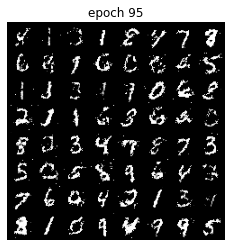

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 95 of 200
Generator loss: 0.00624435, Discriminator loss: 0.01169216


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 96 of 200
Generator loss: 0.00651616, Discriminator loss: 0.01153927


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 97 of 200
Generator loss: 0.00717428, Discriminator loss: 0.01062443


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 98 of 200
Generator loss: 0.00774308, Discriminator loss: 0.01085439


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 99 of 200
Generator loss: 0.00805169, Discriminator loss: 0.01085352


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.48it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


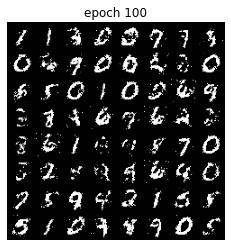

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 100 of 200
Generator loss: 0.00810316, Discriminator loss: 0.01062823


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 101 of 200
Generator loss: 0.00833694, Discriminator loss: 0.01072274


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 102 of 200
Generator loss: 0.01039460, Discriminator loss: 0.01187493


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 103 of 200
Generator loss: 0.01002259, Discriminator loss: 0.00898854


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 104 of 200
Generator loss: 0.01050663, Discriminator loss: 0.01106846


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


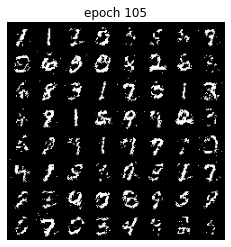

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 105 of 200
Generator loss: 0.00965980, Discriminator loss: 0.00936628


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 106 of 200
Generator loss: 0.00996388, Discriminator loss: 0.01012891


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 107 of 200
Generator loss: 0.01067207, Discriminator loss: 0.00978743


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 108 of 200
Generator loss: 0.00821547, Discriminator loss: 0.01063304


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 109 of 200
Generator loss: 0.00940002, Discriminator loss: 0.01077844


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.48it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


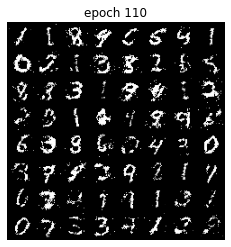

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 110 of 200
Generator loss: 0.00730814, Discriminator loss: 0.01128780


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 111 of 200
Generator loss: 0.00780018, Discriminator loss: 0.01127206


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 112 of 200
Generator loss: 0.00674346, Discriminator loss: 0.01142745


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 113 of 200
Generator loss: 0.00671187, Discriminator loss: 0.01149481


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 114 of 200
Generator loss: 0.00653169, Discriminator loss: 0.01156560


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.53it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


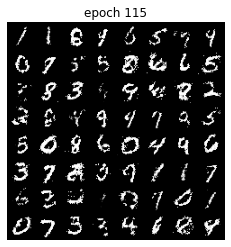

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 115 of 200
Generator loss: 0.00653293, Discriminator loss: 0.01140480


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 116 of 200
Generator loss: 0.00636476, Discriminator loss: 0.01160023


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 117 of 200
Generator loss: 0.00679135, Discriminator loss: 0.01191421


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 118 of 200
Generator loss: 0.00704136, Discriminator loss: 0.01160236


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 119 of 200
Generator loss: 0.00673145, Discriminator loss: 0.01171829


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.52it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


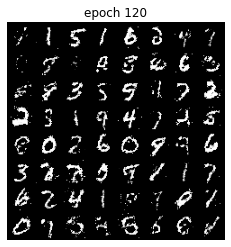

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 120 of 200
Generator loss: 0.00681708, Discriminator loss: 0.01167022


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 121 of 200
Generator loss: 0.00735717, Discriminator loss: 0.01159653


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 122 of 200
Generator loss: 0.00636356, Discriminator loss: 0.01168678


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 123 of 200
Generator loss: 0.00659334, Discriminator loss: 0.01199026


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 124 of 200
Generator loss: 0.00696008, Discriminator loss: 0.01162923


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


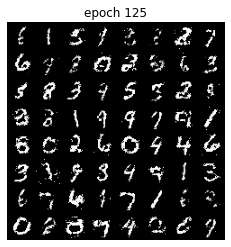

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.61it/s]

Epoch 125 of 200
Generator loss: 0.00703876, Discriminator loss: 0.01151024


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 126 of 200
Generator loss: 0.00648968, Discriminator loss: 0.01168833


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 127 of 200
Generator loss: 0.00692651, Discriminator loss: 0.01154125


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 128 of 200
Generator loss: 0.00698516, Discriminator loss: 0.01096823


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 129 of 200
Generator loss: 0.00750305, Discriminator loss: 0.01071701


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.52it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


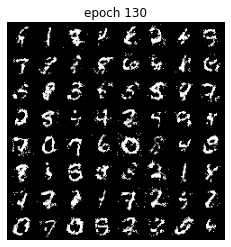

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 130 of 200
Generator loss: 0.00775270, Discriminator loss: 0.01096913


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 131 of 200
Generator loss: 0.00856118, Discriminator loss: 0.01082506


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 132 of 200
Generator loss: 0.00742864, Discriminator loss: 0.01087237


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 133 of 200
Generator loss: 0.00826244, Discriminator loss: 0.01028631


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 134 of 200
Generator loss: 0.00678103, Discriminator loss: 0.01081502


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


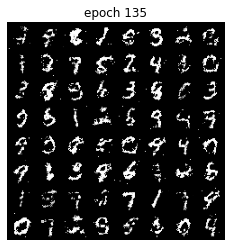

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.77it/s]

Epoch 135 of 200
Generator loss: 0.00729271, Discriminator loss: 0.01096528


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 136 of 200
Generator loss: 0.00878400, Discriminator loss: 0.01059186


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 137 of 200
Generator loss: 0.00727657, Discriminator loss: 0.01141937


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 138 of 200
Generator loss: 0.00796374, Discriminator loss: 0.01050745


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 139 of 200
Generator loss: 0.00681278, Discriminator loss: 0.01101824


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


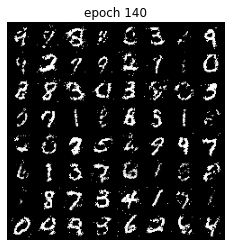

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 140 of 200
Generator loss: 0.00721876, Discriminator loss: 0.01072953


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 141 of 200
Generator loss: 0.00697313, Discriminator loss: 0.01168818


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 142 of 200
Generator loss: 0.00643878, Discriminator loss: 0.01170213


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 143 of 200
Generator loss: 0.00707915, Discriminator loss: 0.01176951


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 144 of 200
Generator loss: 0.00651934, Discriminator loss: 0.01143787


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.49it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


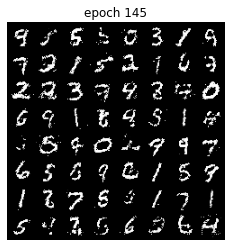

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.61it/s]

Epoch 145 of 200
Generator loss: 0.00644932, Discriminator loss: 0.01152548


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 146 of 200
Generator loss: 0.00626608, Discriminator loss: 0.01181739


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 147 of 200
Generator loss: 0.00660565, Discriminator loss: 0.01212824


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 148 of 200
Generator loss: 0.00679493, Discriminator loss: 0.01200790


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 149 of 200
Generator loss: 0.00625407, Discriminator loss: 0.01163365


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.48it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


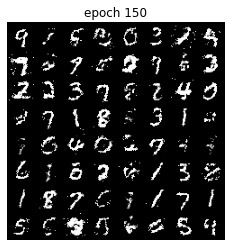

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 150 of 200
Generator loss: 0.00688503, Discriminator loss: 0.01146920


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 151 of 200
Generator loss: 0.00692668, Discriminator loss: 0.01161360


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 152 of 200
Generator loss: 0.00750307, Discriminator loss: 0.01105226


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 153 of 200
Generator loss: 0.00650376, Discriminator loss: 0.01096637


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 154 of 200
Generator loss: 0.00737771, Discriminator loss: 0.01172795


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.49it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


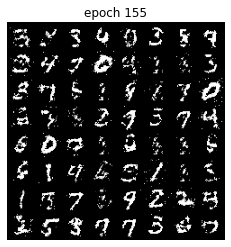

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.61it/s]

Epoch 155 of 200
Generator loss: 0.00769677, Discriminator loss: 0.01164303


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 156 of 200
Generator loss: 0.00893967, Discriminator loss: 0.00928265


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 157 of 200
Generator loss: 0.00857720, Discriminator loss: 0.01071644


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 158 of 200
Generator loss: 0.01196452, Discriminator loss: 0.00844942


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 159 of 200
Generator loss: 0.00926520, Discriminator loss: 0.00935826


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


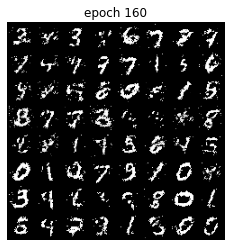

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 160 of 200
Generator loss: 0.00940397, Discriminator loss: 0.01034114


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 161 of 200
Generator loss: 0.00871960, Discriminator loss: 0.01033782


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 162 of 200
Generator loss: 0.00877558, Discriminator loss: 0.01049466


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 163 of 200
Generator loss: 0.00745938, Discriminator loss: 0.01096878


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 164 of 200
Generator loss: 0.00686541, Discriminator loss: 0.01114281


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


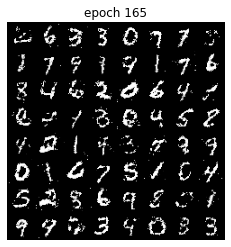

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.61it/s]

Epoch 165 of 200
Generator loss: 0.00693530, Discriminator loss: 0.01103558


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 166 of 200
Generator loss: 0.00667584, Discriminator loss: 0.01143920


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 167 of 200
Generator loss: 0.00658687, Discriminator loss: 0.01118801


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 168 of 200
Generator loss: 0.00663609, Discriminator loss: 0.01149561


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 169 of 200
Generator loss: 0.00665508, Discriminator loss: 0.01154413


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


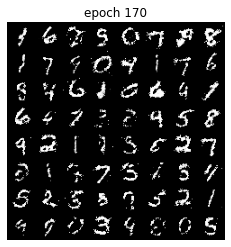

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 170 of 200
Generator loss: 0.00640987, Discriminator loss: 0.01159595


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 171 of 200
Generator loss: 0.00663598, Discriminator loss: 0.01179517


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 172 of 200
Generator loss: 0.00622125, Discriminator loss: 0.01189576


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 173 of 200
Generator loss: 0.00645117, Discriminator loss: 0.01175093


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 174 of 200
Generator loss: 0.00619445, Discriminator loss: 0.01175584


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


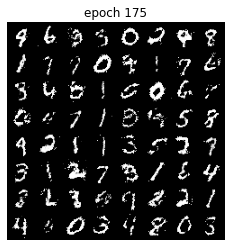

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.61it/s]

Epoch 175 of 200
Generator loss: 0.00670717, Discriminator loss: 0.01177986


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 176 of 200
Generator loss: 0.00620075, Discriminator loss: 0.01177381


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 177 of 200
Generator loss: 0.00623573, Discriminator loss: 0.01157950


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 178 of 200
Generator loss: 0.00672519, Discriminator loss: 0.01163278


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 179 of 200
Generator loss: 0.00646944, Discriminator loss: 0.01150759


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


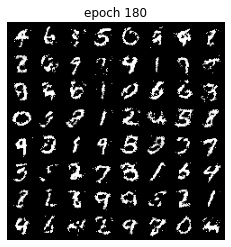

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 180 of 200
Generator loss: 0.00741673, Discriminator loss: 0.01073231


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 181 of 200
Generator loss: 0.00679331, Discriminator loss: 0.01171106


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 182 of 200
Generator loss: 0.00683786, Discriminator loss: 0.01160084


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 183 of 200
Generator loss: 0.00676652, Discriminator loss: 0.01118102


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 184 of 200
Generator loss: 0.00839500, Discriminator loss: 0.01133387


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


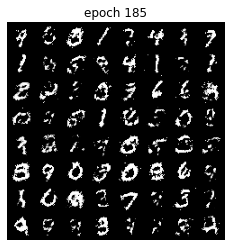

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.77it/s]

Epoch 185 of 200
Generator loss: 0.00698456, Discriminator loss: 0.01082547


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 186 of 200
Generator loss: 0.00764392, Discriminator loss: 0.01094055


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 187 of 200
Generator loss: 0.00757228, Discriminator loss: 0.01140617


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 188 of 200
Generator loss: 0.00776556, Discriminator loss: 0.01140367


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 189 of 200
Generator loss: 0.00719143, Discriminator loss: 0.01018390


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


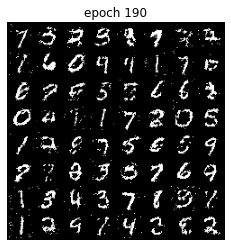

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 190 of 200
Generator loss: 0.00709250, Discriminator loss: 0.01156200


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 191 of 200
Generator loss: 0.00707829, Discriminator loss: 0.01171940


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 192 of 200
Generator loss: 0.00749379, Discriminator loss: 0.01107498


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 193 of 200
Generator loss: 0.00678170, Discriminator loss: 0.01146353


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 194 of 200
Generator loss: 0.00652352, Discriminator loss: 0.01163509


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


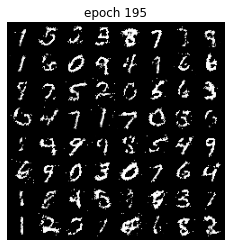

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.53it/s]

Epoch 195 of 200
Generator loss: 0.00632542, Discriminator loss: 0.01160821


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 196 of 200
Generator loss: 0.00639188, Discriminator loss: 0.01175027


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 197 of 200
Generator loss: 0.00639344, Discriminator loss: 0.01186639


  2%|█▍                                                                                | 2/117 [00:00<00:08, 14.32it/s]

Epoch 198 of 200
Generator loss: 0.00666254, Discriminator loss: 0.01197418


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 199 of 200
Generator loss: 0.00684109, Discriminator loss: 0.01138888


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


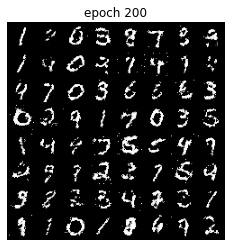

Epoch 200 of 200
Generator loss: 0.00595344, Discriminator loss: 0.01188747


In [23]:
torch.manual_seed(7777)
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

# def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    ######################################
    
# def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    ######################################
    
epochs = 200
    
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        if bi == 116:
            break
        real_images, _ = data
        real_images = real_images.reshape(batch_size, -1).to(device)
        
        #train discriminator
        label_r = label_real(batch_size).to(device)
        label_f = label_fake(sample_size).to(device)
        
        out1 = discriminator(real_images)
        loss_r = criterion(out1, label_r)
        
        fake_images1 = generator(noise)
        out2 = discriminator(fake_images1)
        loss_f = criterion(out2, label_f)

        loss_d = (loss_r + loss_f)
    
        optim_d.zero_grad()
        
        loss_d.backward()
        optim_d.step()
        
        #train generator
        fake_images2 = generator(noise)
        label_g = label_real(sample_size).to(device)
        out3 = discriminator(fake_images2)
        loss_g = criterion(out3, label_g)
    
        optim_g.zero_grad()
        
        loss_g.backward()
        optim_g.step()
    ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.item())
    losses_d.append(epoch_loss_d.item())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [24]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [25]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

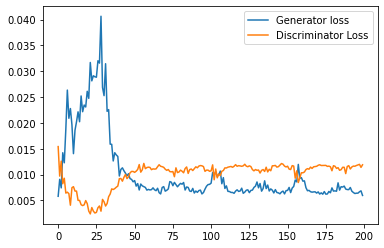

In [26]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')